## SC4061 Assignment 1

### 2.1 Contrast Stretching

#### Part a & b: Load Image, Convert to Greyscale & Display Image

Grayscale Image shape: (320, 443), Data type: uint8


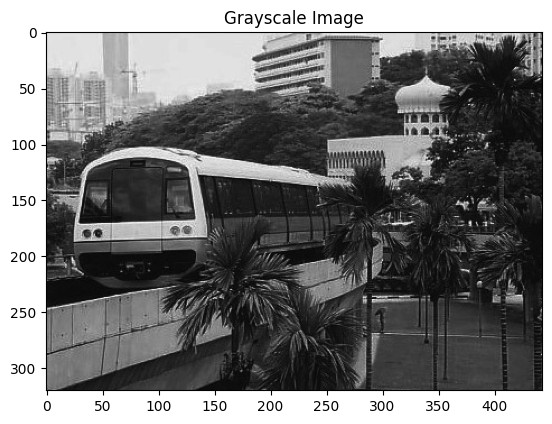

In [195]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image 
Pc = cv2.imread('mrt-train.jpg')

# Convert the image to grayscale
P = cv2.cvtColor(Pc, cv2.COLOR_BGR2GRAY)

# Display the shape and data type of the grayscale image
print(f"Grayscale Image shape: {P.shape}, Data type: {P.dtype}")

# Display the grayscale image
plt.imshow(P, cmap='gray')
plt.title('Grayscale Image')
plt.show()

#### Part c: Check for Minimum and Maximum Intensities

In [196]:
# Part c: Check the minimum and maximum intensities
min_val = np.min(P)
max_val = np.max(P)
print(f"Min intensity: {min_val}, Max intensity: {max_val}")


Min intensity: 13, Max intensity: 204


#### Part d: Perform Contrast Stretching (Two Lines)

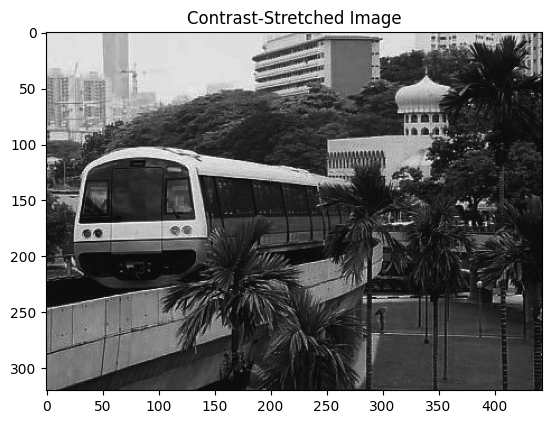

In [20]:
# Part d: Perform dynamic contrast stretching
P2 = (P - np.min(P)) * (255.0 / (np.max(P) - np.min(P)))  # Stretch the contrast
P2 = P2.astype(np.uint8)  # Convert the result back to uint8 for proper display

# Display the contrast-stretched image
plt.imshow(P2, cmap='gray')
plt.title('Contrast-Stretched Image')
plt.show()


The darkest pixel now has a value of 0, and the brightest pixel is set to 255, with all intermediate pixel values scaled proportionally. This adjustment stretches the pixel intensities to fully utilize the uint8 range of 0-255, effectively enhancing the image's contrast.

Initially, the intensity range spanned from a minimum of 13 to a maximum of 204. Through contrast stretching, these values are remapped to cover the entire 0-255 range. This transformation maximizes the use of the available range, ensuring that the darkest and brightest pixels are fully represented, which enhances both the contrast and the detail within the image.

#### Part e: Redisplay the Image with Correct Display Handling

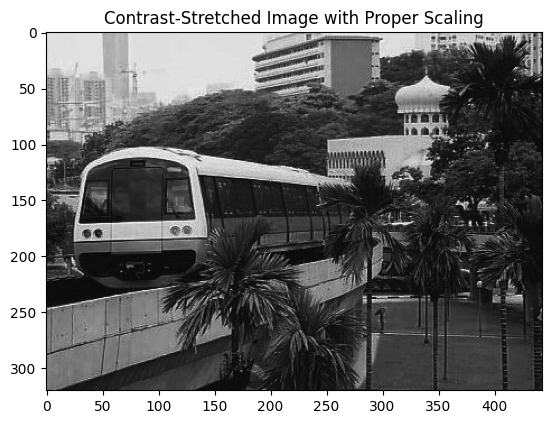

In [21]:
# Part e: Redisplay the contrast-stretched image with automatic scaling
plt.imshow(P2, cmap='gray', vmin=0, vmax=255)  # vmin and vmax ensure proper scaling
plt.title('Contrast-Stretched Image with Proper Scaling')
plt.show()

In [23]:
print(f"Original grayscale image min: {np.min(P)}, max: {np.max(P)}")
print(f"Contrast-stretched image min: {np.min(P2)}, max: {np.max(P2)}")

Original grayscale image min: 13, max: 204
Contrast-stretched image min: 0, max: 254


### 2.2 Histogram Equalization
#### Part a: Display the Image Intensity Histogram with 10 and 256 Bins

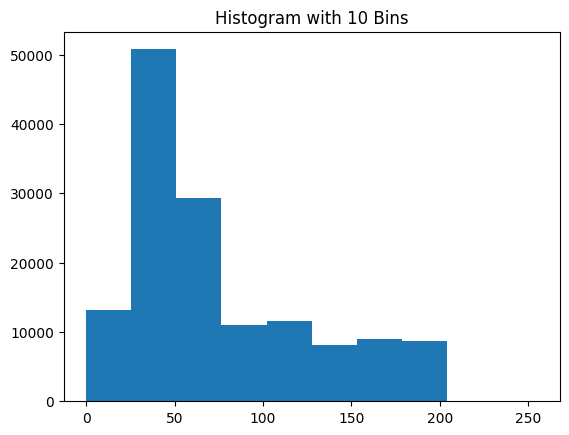

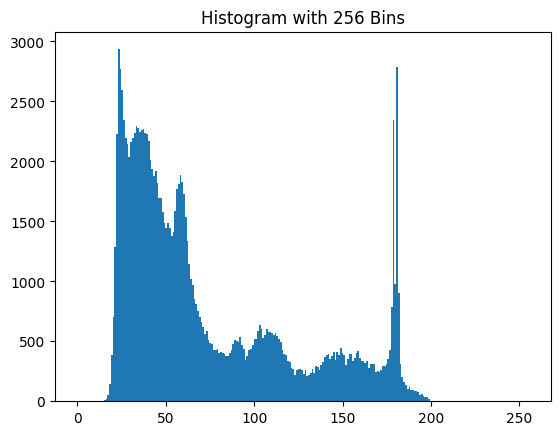

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image 
P = cv2.imread('mrt-train.jpg', cv2.IMREAD_GRAYSCALE)

# Part a: Display the histogram with 10 bins
plt.figure()
plt.hist(P.ravel(), bins=10, range=[0, 255])
plt.title('Histogram with 10 Bins')
plt.show()

# Display the histogram with 256 bins
plt.figure()
plt.hist(P.ravel(), bins=256, range=[0, 255])
plt.title('Histogram with 256 Bins')
plt.show()


**What are the differences between the histograms with 10 bins and 256 bins?**

**Summary:**
The histogram with 10 bins is more generalized and easier to interpret for quick analysis but loses details.
The histogram with 256 bins shows a more precise distribution of pixel intensities.

**Differences:**

Image intensity histogram with 10 bins:
The pixel intensities are grouped into only 10 bins, providing a broad and simplified view of the image's pixel intensity distribution.
The histogram features fewer distinct peaks, making it difficult to pinpoint specific areas with large clusters of pixel intensities. This overview lacks the granularity needed to identify exact intensity levels across the image.

Image intensity histogram with 256 bins:
The pixel intensities are divided into 256 bins, offering a highly detailed and precise representation of the image's pixel intensity distribution.
With more bins, the histogram displays numerous peaks, revealing a wide spread of pixel intensities. Specific intensity levels can be identified, such as large clusters of pixels within low intensity ranges (20-40) and a noticeable concentration around intensity level 180. These details are obscured in the 10-bin histogram, which merges such peaks, losing the subtleties in intensity variation across the image.

#### Part b: Perform Histogram Equalization

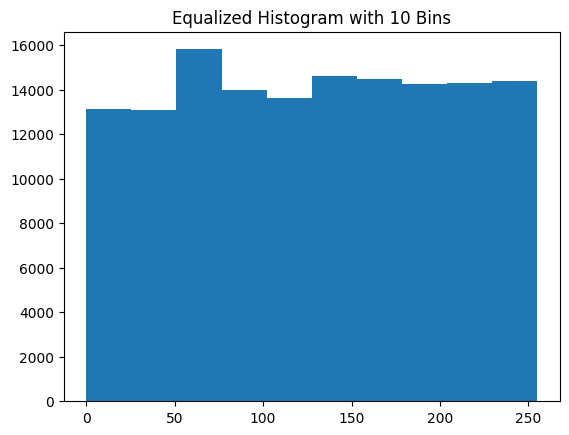

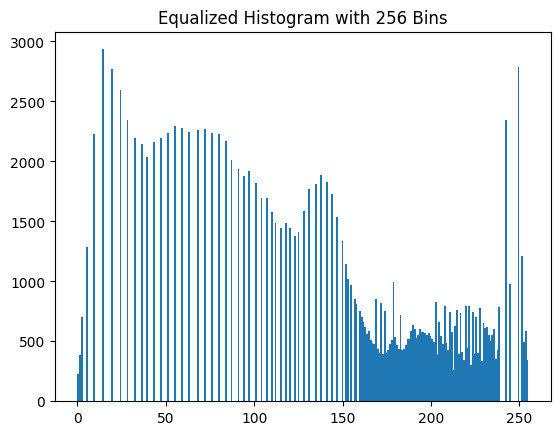

In [31]:
# Part b: Perform histogram equalization
P3 = cv2.equalizeHist(P)

# Display the histograms for the equalized image with 10 and 256 bins
plt.figure()
plt.hist(P3.ravel(), bins=10, range=[0, 255])
plt.title('Equalized Histogram with 10 Bins')
plt.show()

plt.figure()
plt.hist(P3.ravel(), bins=256, range=[0, 255])
plt.title('Equalized Histogram with 256 Bins')
plt.show()


**Are the histograms equalized? What are the similarities and differences between the histograms?**

Yes, both histograms are more equalized than the original image intensity histogram. In each case, pixel intensities have been adjusted to spread more evenly across the full range of 0-255, improving overall contrast.


**Similarities:** Both equalized histograms show a more uniform distribution compared to their original versions, with pixel intensities spread more evenly. This adjustment reduces clustering, ensuring that intensities are distributed over a broader range.

**Differences:** While both histograms are equalized, the 256-bin histogram retains some distinct peaks and dips, indicating subtle variations in intensity distribution. In contrast, the 10-bin histogram appears almost perfectly equalized, with no noticeable peaks or dips. Additionally, the average intensity per bin is higher in the 10-bin histogram, as it compresses broader ranges of intensity values into fewer bins, whereas the 256-bin histogram offers a more granular view, revealing finer details of intensity distribution.

#### Part c: Rerun the Histogram Equalization on P3

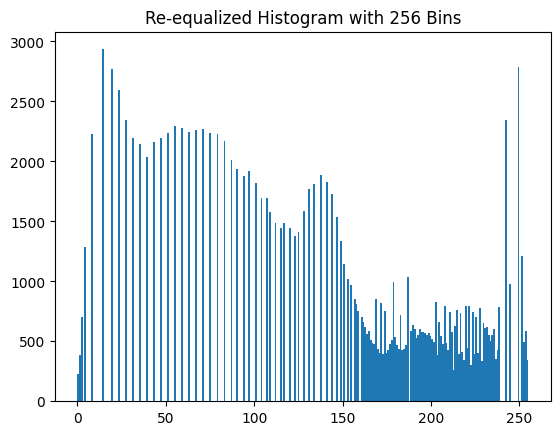

In [32]:
# Part c: Rerun histogram equalization on the already equalized image
P3 = cv2.equalizeHist(P3)

# Display the histogram for the re-equalized image with 256 bins
plt.figure()
plt.hist(P3.ravel(), bins=256, range=[0, 255])
plt.title('Re-equalized Histogram with 256 Bins')
plt.show()

**Does the histogram become more uniform? Why?**


No, both the 10-bin and 256-bin histograms remain largely unchanged.

In the initial histogram equalization, pixel intensities are redistributed to be as uniform as possible across the available range. 
When histogram equalization is applied again to the equalized image (P3), the pixel values remain unchanged because they have already been redistributed. Since the CDF remains the same, reapplying the process has no further effect. The histogram does not become more uniform because the intensities are already spread as much as possible. Thus, the result remains the same after re-equalization.

### 2.3 Linear Spatial Filtering

#### Part a: Generate Gaussian Filters and Normalize

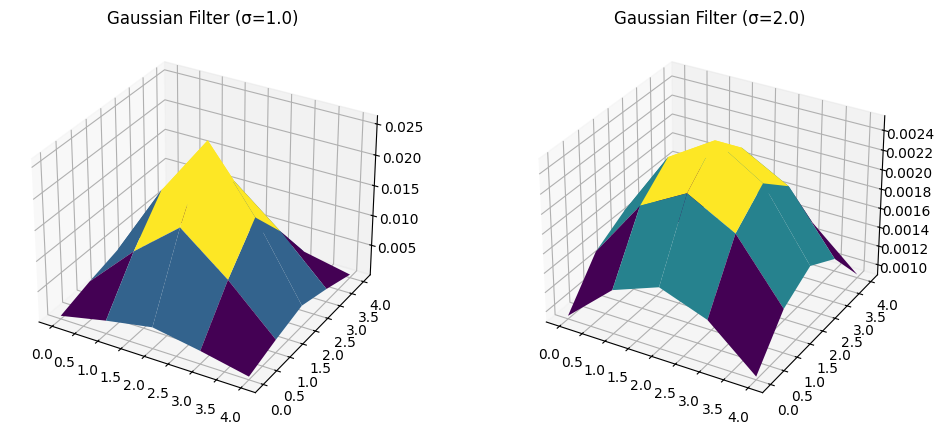

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to create a Gaussian filter
def gaussian_filter(size, sigma):
    ax = np.linspace(-(size // 2), size // 2, size)
    x, y = np.meshgrid(ax, ax)
    gauss = np.exp(-(x**2 + y**2) / (2.0 * sigma**2))
    return gauss / (2 * np.pi * sigma**2 * np.sum(gauss))  # Normalize to sum to 1

# Generate the filters
filter_1 = gaussian_filter(5, 1.0)
filter_2 = gaussian_filter(5, 2.0)

# Plotting the filters as 3D surface plots
fig = plt.figure(figsize=(12, 5))

# Filter with sigma=1.0
ax1 = fig.add_subplot(121, projection='3d')
x, y = np.meshgrid(range(5), range(5))
ax1.plot_surface(x, y, filter_1, cmap='viridis')
ax1.set_title('Gaussian Filter (σ=1.0)')

# Filter with sigma=2.0
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, filter_2, cmap='viridis')
ax2.set_title('Gaussian Filter (σ=2.0)')

plt.show()


#### Part b: Load Image with Gaussian Noise

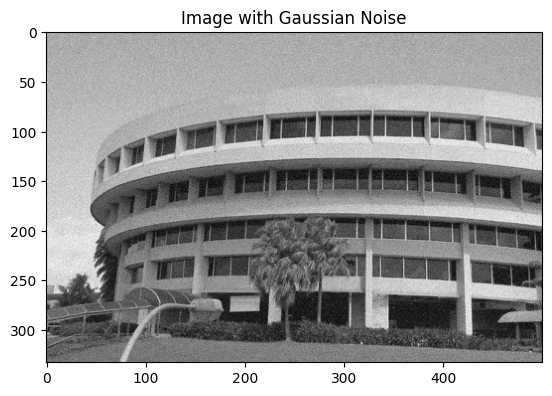

In [34]:
import cv2

# Load the noisy image
image_gaussian_noise = cv2.imread('lib-gn.jpg', cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image_gaussian_noise, cmap='gray')
plt.title('Image with Gaussian Noise')
plt.show()

#### Part c: Filter the Image Using the Gaussian Filters

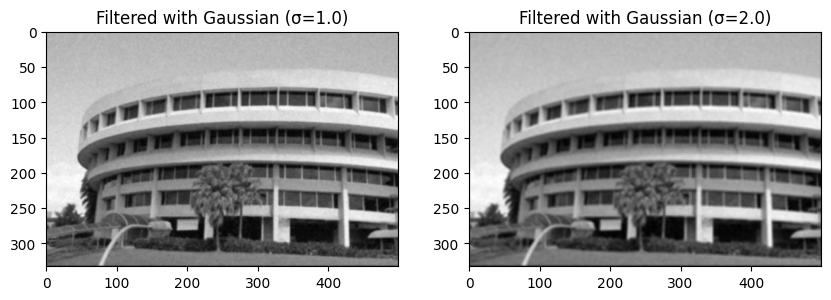

In [35]:
from scipy.signal import convolve2d

# Apply the Gaussian filters using convolution
filtered_image_1 = convolve2d(image_gaussian_noise, filter_1, mode='same')
filtered_image_2 = convolve2d(image_gaussian_noise, filter_2, mode='same')

# Display the filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(filtered_image_1, cmap='gray')
plt.title('Filtered with Gaussian (σ=1.0)')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image_2, cmap='gray')
plt.title('Filtered with Gaussian (σ=2.0)')

plt.show()

**Filter Effectiveness:**

- σ=1.0: Provides mild smoothing, reducing some Gaussian noise while preserving details and edges. Effective when detail retention is prioritized over complete noise removal.

- σ=2.0: Applies stronger smoothing, significantly reducing noise but blurring edges and fine details. Suitable for scenarios where noise reduction is more important than detail preservation.

**Trade-offs:**

- Detail Preservation vs. Noise Reduction: 
  - σ=1.0 maintains sharpness, useful for clarity and texture preservation.
  - σ=2.0 offers better noise reduction but sacrifices sharpness, leading to a blurred appearance.

- Impact of Not Filtering:
  - Without filtering, Gaussian noise remains, making the image grainy and reducing visibility.
  - Filtering improves visibility, with a trade-off between sharpness and smoothness.

In summary, σ=1.0 balances noise reduction and detail preservation, while σ=2.0 emphasizes noise reduction at the expense of image sharpness. The choice depends on whether the focus is on retaining details or achieving stronger noise reduction.


#### Part d: Load Image with Speckle Noise

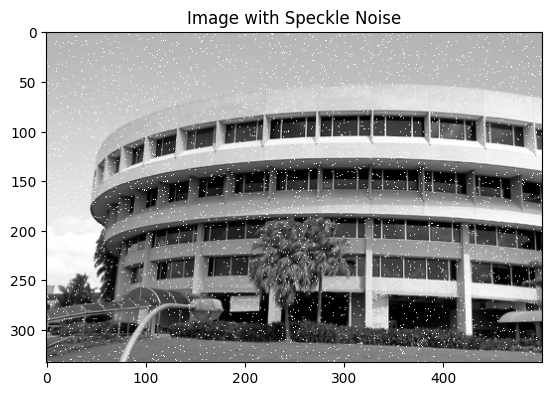

In [36]:
# Load the image with speckle noise
image_speckle_noise = cv2.imread('lib-sp.jpg', cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image_speckle_noise, cmap='gray')
plt.title('Image with Speckle Noise')
plt.show()

#### Part e: Apply Filters to Image with Speckle Noise

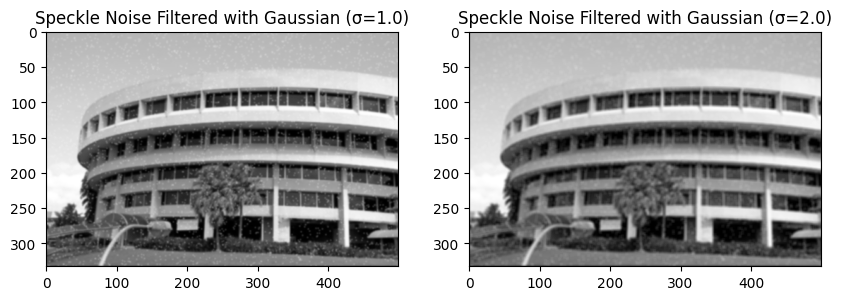

In [37]:
# Apply the Gaussian filters using convolution on the speckle noise image
filtered_speckle_1 = convolve2d(image_speckle_noise, filter_1, mode='same')
filtered_speckle_2 = convolve2d(image_speckle_noise, filter_2, mode='same')

# Display the filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(filtered_speckle_1, cmap='gray')
plt.title('Speckle Noise Filtered with Gaussian (σ=1.0)')

plt.subplot(1, 2, 2)
plt.imshow(filtered_speckle_2, cmap='gray')
plt.title('Speckle Noise Filtered with Gaussian (σ=2.0)')

plt.show()

**Filter Effectiveness on Speckle Noise:**

- σ=1.0: Provides a mild smoothing effect, reducing some speckle noise but preserving details and edges. Less effective at removing speckle noise, as this type of noise is not as effectively handled by Gaussian filters.

- σ=2.0: Applies stronger smoothing, which reduces more speckle noise but also blurs fine details and edges. Offers better noise reduction but is still not ideal for speckle noise, as Gaussian filters are designed more for Gaussian noise.

**Trade-offs:**

- Detail Preservation vs. Noise Reduction:
  - σ=1.0 retains more image details, making it preferable when preserving texture and edges is important.
  - σ=2.0 reduces more noise but causes more blurring, which can obscure details.

- Effectiveness on Speckle Noise:
  - Gaussian filters are generally less effective on speckle noise compared to Gaussian noise.
  - Median filtering would typically perform better on speckle noise by targeting outlier values.

In summary, while σ=1.0 maintains more detail, σ=2.0 offers slightly better noise reduction. However, Gaussian filters are not optimal for speckle noise, and alternatives like median filtering would be more effective in handling this type of noise.


### 2.4 Median Filtering

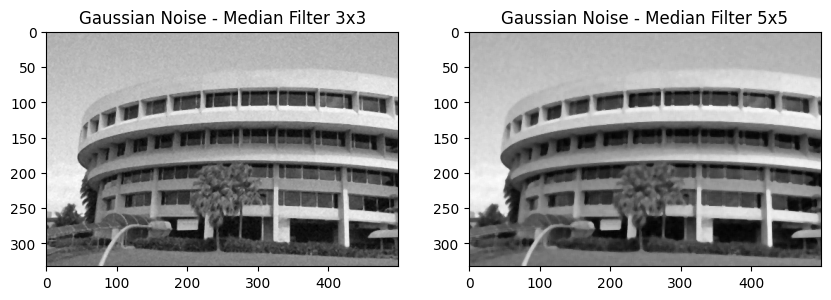

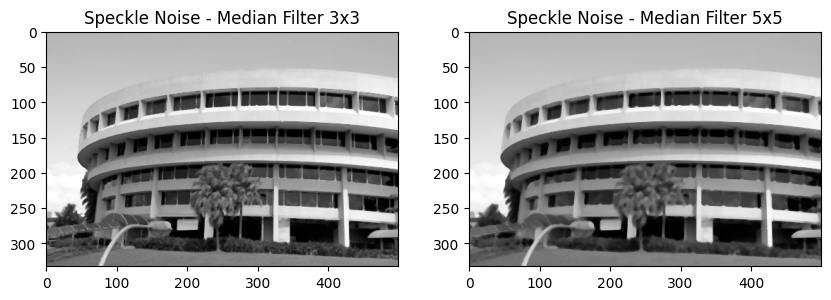

In [40]:
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter

# Load the images with Gaussian and Speckle noise
image_gaussian_noise = cv2.imread('lib-gn.jpg', cv2.IMREAD_GRAYSCALE)
image_speckle_noise = cv2.imread('lib-sp.jpg', cv2.IMREAD_GRAYSCALE)

# Apply median filtering on Gaussian noise image with 3x3 and 5x5 filters
median_gaussian_3x3 = median_filter(image_gaussian_noise, size=3)
median_gaussian_5x5 = median_filter(image_gaussian_noise, size=5)

# Apply median filtering on Speckle noise image with 3x3 and 5x5 filters
median_speckle_3x3 = median_filter(image_speckle_noise, size=3)
median_speckle_5x5 = median_filter(image_speckle_noise, size=5)

# Display results for Gaussian noise image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(median_gaussian_3x3, cmap='gray')
plt.title('Gaussian Noise - Median Filter 3x3')

plt.subplot(1, 2, 2)
plt.imshow(median_gaussian_5x5, cmap='gray')
plt.title('Gaussian Noise - Median Filter 5x5')
plt.show()

# Display results for Speckle noise image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(median_speckle_3x3, cmap='gray')
plt.title('Speckle Noise - Median Filter 3x3')

plt.subplot(1, 2, 2)
plt.imshow(median_speckle_5x5, cmap='gray')
plt.title('Speckle Noise - Median Filter 5x5')
plt.show()


**Comparison with Gaussian Filtering:**

- Gaussian Noise:
  - Median filters are less effective, as they target isolated noise, not continuous noise like Gaussian noise.
  - Gaussian filters are better suited for Gaussian noise due to their averaging effect.

- Speckle Noise:
  - Median filters effectively reduce speckle noise by targeting high-intensity, isolated pixels, preserving edges better than Gaussian filters.

**Trade-offs:**

- Median Filtering:
  - Pros: Excellent for speckle and salt-and-pepper noise, preserves edges.
  - Cons: Less effective on Gaussian noise; larger sizes may blur details.

- Gaussian Filtering:
  - Pros: Good for Gaussian noise, provides smooth transitions.
  - Cons: Blurs edges, less effective on speckle and salt-and-pepper noise.

Summary: Median filters are ideal for speckle noise, especially with larger neighborhood sizes, while Gaussian filters are best for Gaussian noise. Choose median filters for isolated noise and Gaussian filters for continuous noise.


### 2.5 Suppressing Noise Interference Patterns

#### Part a: Load the Image and Observe Interference

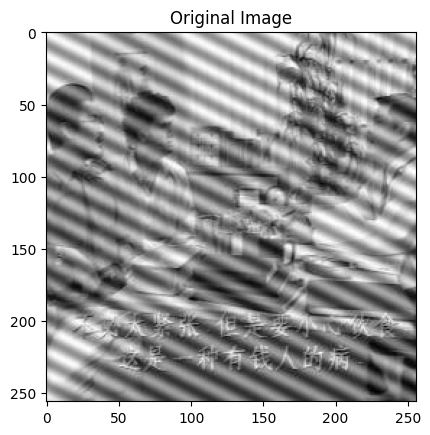

In [197]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

P5 = cv2.imread('pck-int.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(P5, cmap='gray')
plt.title('Original Image')
plt.show()



#### Part b: Compute and Display the Fourier Transform

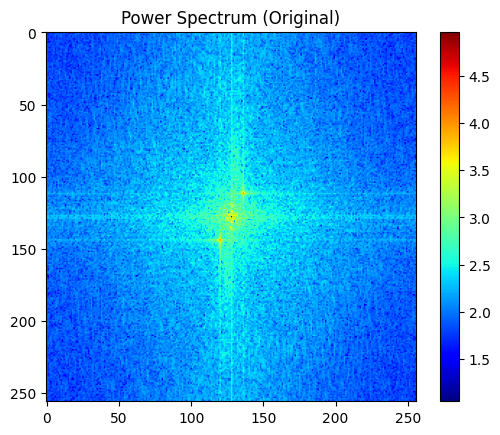

In [198]:
F = np.fft.fft2(P5)
S = np.abs(F)
plt.imshow(np.fft.fftshift(S ** 0.1), cmap='jet')
plt.title('Power Spectrum (Original)')
plt.colorbar()
plt.show()



#### Part c: Display Power Spectrum Without fftshift and Identify Peaks

In [199]:
# Part (c): Initialize coordinate suppression (replace with coordinates from visual inspection)
a = 2
F1 = np.copy(F)
F1[241-a:241+a+1, 9-a:9+a+1] = 0
F1[17-a:17+a+1, 249-a:249+a+1] = 0



The peaks are (249,17), (255,1), (1,1), (255,256) and (9, 241).

#### Part d: Suppress Interference by Zeroing Out Peaks 
#### Part e: Reconstruction and Enhancement of Interference-Suppressed Image

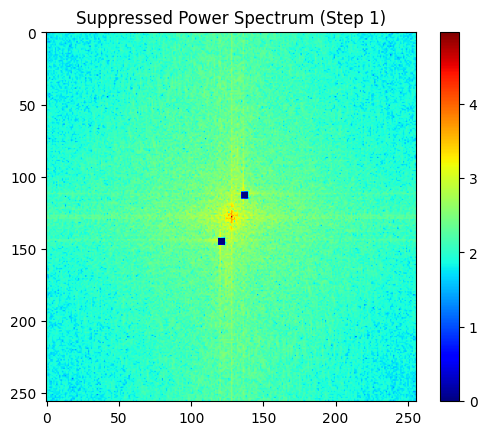

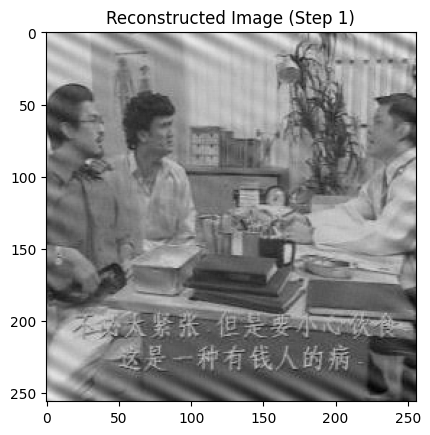

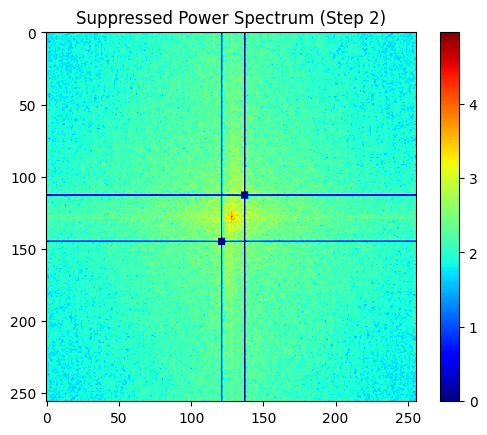

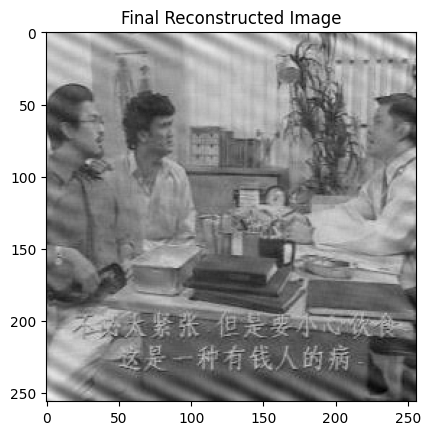

In [201]:
# Part (d): Display the suppressed power spectrum
S1 = np.abs(F1)
plt.imshow(np.fft.fftshift(S1 ** 0.1), cmap='jet')
plt.title('Suppressed Power Spectrum (Step 1)')
plt.colorbar()
plt.show()

# Part (e): Perform inverse FFT to reconstruct the image
F3 = np.fft.ifft2(F1)
F4 = np.abs(F3).astype(np.uint8)
plt.imshow(F4, cmap='gray')
plt.title('Reconstructed Image (Step 1)')
plt.show()

# Further suppression along the specified columns and rows
F2 = np.copy(F1)
v, h = F1.shape
F2[:, 9] = 0
F2[:, 249] = 0
F2[17, :] = 0
F2[241, :] = 0

# Part (d): Display the further suppressed power spectrum
S2 = np.abs(F2)
plt.imshow(np.fft.fftshift(S2 ** 0.1), cmap='jet')
plt.title('Suppressed Power Spectrum (Step 2)')
plt.colorbar()
plt.show()

# Part (e): Perform inverse FFT to reconstruct the final image
F5 = np.fft.ifft2(F2)
F6 = np.abs(F5).astype(np.uint8)
plt.imshow(F6, cmap='gray')
plt.title('Final Reconstructed Image')
plt.show()



**Analysis:**

The diagonal lines are not completely removed; only the central portions show some improvement. In relation to step (c), setting the neighboring elements around the identified peaks to zero in the frequency domain alters the Fourier basis functions, which reduces the diagonal lines in the image.

To enhance the results further, we could also set the horizontal and vertical elements extending from the identified peak points to zero. These bright lines likely represent high-frequency components that contribute to the prominent diagonal lines in the image. This approach may help to reduce the interference more effectively.

#### Part f: Removal of Repetitive Fence Patterns from Primate Image

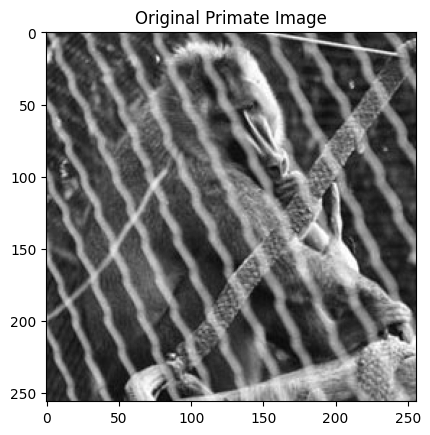

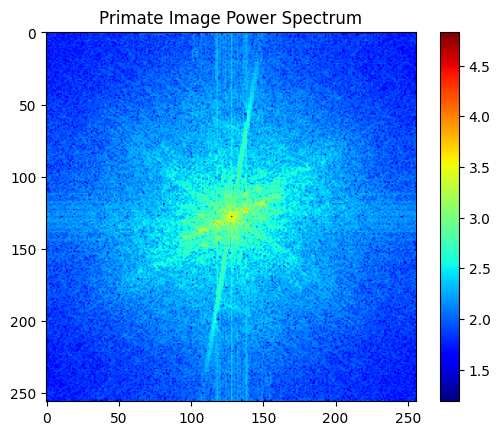

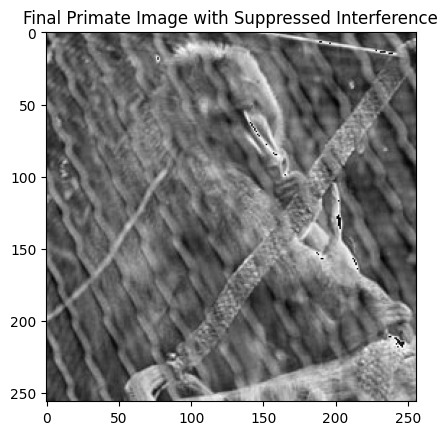

In [202]:
# Part (f): Process 'primate-caged.jpg' similarly
P6 = cv2.imread('primate-caged.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(P6, cmap='gray')
plt.title('Original Primate Image')
plt.show()

FF = np.fft.fft2(P6)
SS = np.abs(FF)
plt.imshow(np.fft.fftshift(SS ** 0.1), cmap='jet')
plt.title('Primate Image Power Spectrum')
plt.colorbar()
plt.show()

# Suppress the selected coordinates (replace with identified coordinates)
coords = [(252, 11), (4, 248), (248, 22), (11, 237)]
for (y, x) in coords:
    FF[y-a:y+a+1, x-a:x+a+1] = 0

# Zero out specified rows and columns
rows = [252, 4, 248, 11]
cols = [11, 248, 22, 237]

for row in rows:
    FF[row, :] = 0

for col in cols:
    FF[:, col] = 0

# Perform inverse FFT to reconstruct the final primate image
RR = np.fft.ifft2(FF)
R = np.abs(RR).astype(np.uint8)
plt.imshow(R, cmap='gray')
plt.title('Final Primate Image with Suppressed Interference')
plt.show()




### 2.6: Undoing Perspective Distortion of Planar Surface

#### Part a: Load and Display the Image

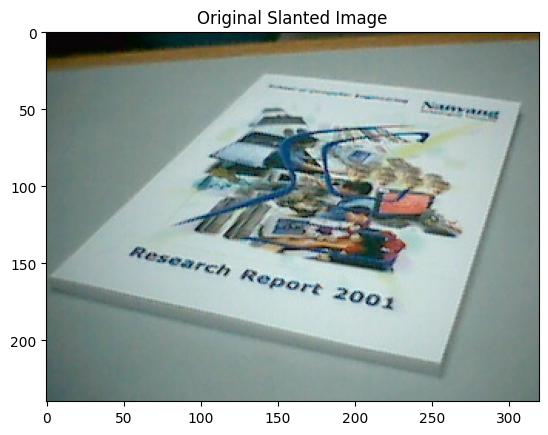

In [151]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('book.jpg')

# Convert the image to RGB for displaying in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image_rgb)
plt.title('Original Slanted Image')
plt.show()

#### Part b: Identify the Four Corners Using ginput

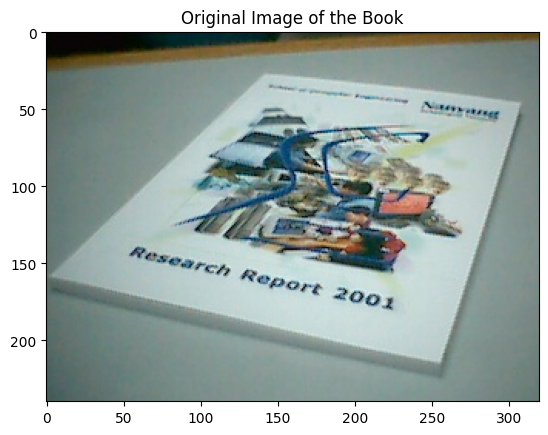

Source points (Image):
 [[143.5   27.75]
 [309.5   46.25]
 [257.   215.25]
 [  4.   159.25]]
Destination points (A4):
 [[  0.   0.]
 [210.   0.]
 [210. 290.]
 [  0. 290.]]


In [158]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image of the book
image = cv2.imread('book.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image_rgb)
plt.title("Original Image of the Book")
plt.axis('on')
plt.show()

# Provided source points for the book's corners in the image
X = np.array([143.5, 309.5, 257.0, 4.0])
Y = np.array([27.75, 46.25, 215.25, 159.25])

# Destination points for A4 paper size (210x290 mm)
x = np.array([0, 210, 210, 0])
y = np.array([0, 0, 290, 290])

# Combine source points into an array
src_pts = np.vstack([X, Y]).T.astype(np.float32)

# Combine destination points into an array
dst_pts = np.vstack([x, y]).T.astype(np.float32)

print("Source points (Image):\n", src_pts)
print("Destination points (A4):\n", dst_pts)


#### Part c: Calculate the Perspective Transformation Matrix

In [159]:
# Calculate the perspective transformation matrix
transformation_matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)

# Print the transformation matrix for reference
print("Transformation Matrix:\n", transformation_matrix)


Transformation Matrix:
 [[ 1.48152731e+00  1.57165825e+00 -2.56212685e+02]
 [-4.07384652e-01  3.65545148e+00 -4.29790808e+01]
 [ 2.00052559e-04  5.35462496e-03  1.00000000e+00]]


#### Part d: Apply the Perspective Transformation

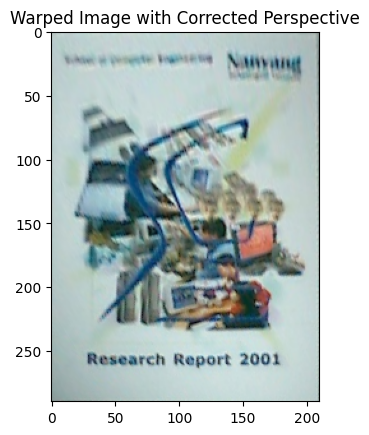

In [216]:
# Apply the perspective warp to the image using the calculated matrix
a4_width, a4_height = 210, 290  # A4 dimensions in mm
warped_image = cv2.warpPerspective(image_rgb, transformation_matrix, (a4_width, a4_height))

# Display the warped image to check the perspective correction
plt.imshow(warped_image)
plt.title("Warped Image with Corrected Perspective")
plt.axis('on')
plt.show()


**Analysis:**

Yes, the transformed image correctly presents a frontal view of the book, which aligns with expectations. However, there is noticeable distortion in the resulting image. 

This distortion may arise from slight inaccuracies in the alignment of the original image coordinates \(X\) and \(Y\) with their corresponding target coordinates \(imageX\) and \(imageY\). Additionally, the quality of the transformed image could be compromised by the low resolution of the original image, which may limit the clarity and precision of the final output.

#### Part e: Identify and Enhance the Pink Area in the Transformed Image


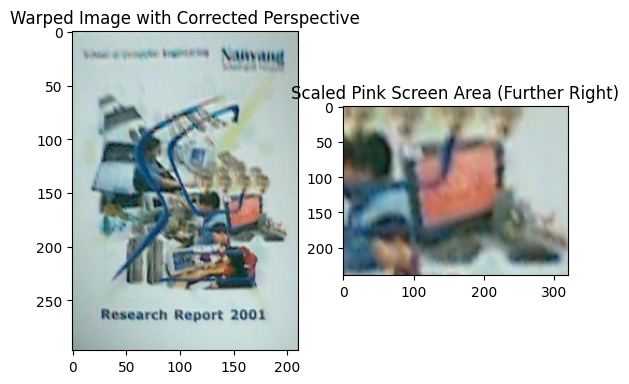

In [252]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Original coordinates of the book's corners in the image (clockwise or counterclockwise order)
src_points = np.array([[143, 28], [6, 159], [257, 214], [308, 47]], dtype='float32')

# Desired coordinates for A4 paper dimensions (210x297 mm) mapped to the image
dst_points = np.array([[0, 0], [0, 297], [210, 297], [210, 0]], dtype='float32')

# Compute the perspective transformation matrix
transformation_matrix = cv2.getPerspectiveTransform(src_points, dst_points)

# Load the original image
image = cv2.imread('book.jpg')

# Apply the perspective warp to get the frontal view
a4_width, a4_height = 210, 297
warped_image = cv2.warpPerspective(image, transformation_matrix, (a4_width, a4_height))

# Adjusted coordinates for the pink rectangular area (further to the right)
x_start, y_start = 120, 140  # Moved further to the right
x_end, y_end = 200, 200      # Increased x_end accordingly

# Crop the pink area based on new coordinates
pink_area = warped_image[y_start:y_end, x_start:x_end]

# Scale the cropped pink area (example scale factor of 4)
scale_factor = 4
pink_area_scaled = cv2.resize(pink_area, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)

# Display the original warped image and scaled pink area side by side
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB))
plt.title("Warped Image with Corrected Perspective")
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(pink_area_scaled, cv2.COLOR_BGR2RGB))
plt.title("Scaled Pink Screen Area (Further Right)")
plt.axis('on')

plt.show()


#### Part f: Enhance the Isolated Pink Area (Optional Contrast Adjustment)

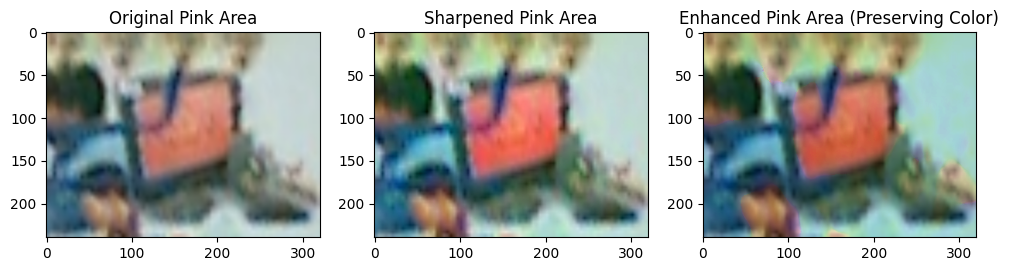

In [251]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import unsharp_mask

# Assuming 'pink_area_scaled' is the cropped pink area that we want to enhance

# Convert to HSV color space to target the pink color
hsv_image = cv2.cvtColor(pink_area_scaled, cv2.COLOR_BGR2HSV)

# Apply sharpening using unsharp mask
sharpened_image = unsharp_mask(pink_area_scaled, radius=1.0, amount=1.0)
sharpened_image = (sharpened_image * 255).astype('uint8')  # Rescale for display

# Extract H, S, V channels
h, s, v = cv2.split(hsv_image)

# Increase saturation to make the pink more vivid
s = cv2.add(s, 40)  # Increase saturation by 40, adjust as needed

# Merge the channels back
enhanced_hsv = cv2.merge([h, s, v])

# Convert back to BGR for display
enhanced_pink_area = cv2.cvtColor(enhanced_hsv, cv2.COLOR_HSV2BGR)

# Display the images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(pink_area_scaled, cv2.COLOR_BGR2RGB))
plt.title("Original Pink Area")
plt.axis('on')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Sharpened Pink Area")
plt.axis('on')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(enhanced_pink_area, cv2.COLOR_BGR2RGB))
plt.title("Enhanced Pink Area (Preserving Color)")
plt.axis('on')

plt.show()


### 2.7 Code two Perceptron 


#### Perceptron Implementation Using Algorithm 1 

Algorithm 1 iteratively adjusts weights based on misclassifications to find a linear decision boundary that separates two classes. It updates the weights only when a classification error occurs. If an input point is correctly classified, the weights remain unchanged. The algorithm alternates between two input points and stops when both points are classified correctly in consecutive steps, indicating convergence. The learning rate is set to α = 1 , which scales the weight adjustments. This method ensures the perceptron learns effectively while minimizing unnecessary updates.

In [259]:
import numpy as np

# Define inputs and parameters
x1 = np.array([3, 3, 1])
x2 = np.array([1, 1, 1])
weights = np.array([0, 0, 0])
lr = 1
k = 1
correct = 0
max_iterations = 1000  # Set a maximum iteration limit

while k <= max_iterations:
    if k % 2 == 1:  # Odd iterations: classify x1
        x = x1
        result = np.dot(weights, x)
        if result > 0:
            correct += 1
        else:
            weights = weights + lr * x
            correct = 0
    else:  # Even iterations: classify x2
        x = x2
        result = np.dot(weights, x)
        if result < 0:
            correct += 1
        else:
            weights = weights - lr * x
            correct = 0
    
    # Check for convergence
    if correct == 2:
        break
    
    # Update iteration count
    k += 1

# Output results
print("Total iterations:", k)
print("Final weights:", weights)


Total iterations: 12
Final weights: [ 1  1 -3]


#### Decision Boundary for Algorithm 1

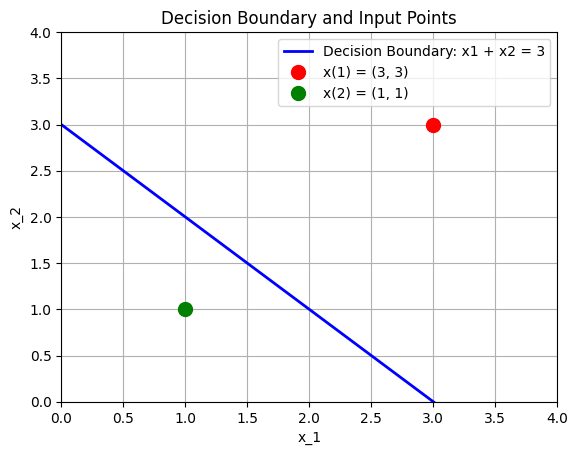

In [262]:
import numpy as np
import matplotlib.pyplot as plt

# Final weights from Algorithm 1
weights = np.array([1, 1, -3])  # Based on the example you provided, adjust if needed

# Generate x1 values to plot the decision boundary line x1 + x2 = 3
x1_vals = np.linspace(0, 4, 100)
x2_vals = (3 - weights[0] * x1_vals) / weights[1]

# Define the points x1 and x2
x1 = np.array([3, 3])
x2 = np.array([1, 1])

# Plot the decision boundary
plt.plot(x1_vals, x2_vals, 'b-', linewidth=2, label="Decision Boundary: x1 + x2 = 3")

# Plot points x1 and x2
plt.plot(x1[0], x1[1], 'ro', markersize=10, label='x(1) = (3, 3)')
plt.plot(x2[0], x2[1], 'go', markersize=10, label='x(2) = (1, 1)')

# Set axis limits
plt.xlim(0, 4)
plt.ylim(0, 4)

# Add labels and title
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Decision Boundary and Input Points')

# Add legend
plt.legend(loc='best')

# Display the grid
plt.grid(True)

# Show plot
plt.show()


#### Perceptron Implementation using Algorithm 2

Algorithm 2
Algorithm 2 uses a loss function to adjust its weights based on each input's contribution to the overall error. In every iteration, the algorithm calculates the loss by comparing the predicted output with the desired output, which allows for more precise adjustments to the weights. This method helps the algorithm to gradually minimize error over time, improving classification accuracy.

The process includes normalizing the input vectors so that their magnitudes are equal to one. This normalization is crucial because weight updates depend directly on the input vectors, and larger vectors can disproportionately affect the weight adjustments, leading to instability or excessive oscillations in the loss. By normalizing, we ensure that all inputs have a fair contribution to the learning process.

With a learning rate set to 0.5, Algorithm 2 typically runs for a fixed number of iterations (100 in this case). By halving the learning rate compared to Algorithm 1, the algorithm achieves smoother weight adjustments, leading to a more gradual convergence. During the process, it alternates between two input vectors, with the goal of minimizing the overall error across all iterations.

In this algorithm, we set the desired outputs to 1 and -1 for the two input vectors, respectively. These values direct the weight adjustments by indicating whether the current classification aligns with the target classification.

Final Weights: [ 1.3705408   1.3705408  -4.37015829]
Costs over Iterations: [0.5        1.07104247 0.69442948 0.81680687 0.69829304 0.70438721
 0.65108334 0.62996838 0.59505747 0.56921454 0.54089937 0.51578265
 0.49093533 0.46773295 0.44540305 0.42425121 0.40404784 0.38483458
 0.36652094 0.34908583 0.33247659 0.31665935 0.30159373 0.28724531
 0.27357931 0.2605636  0.24816706 0.23636032 0.22511528 0.21440525
 0.20420474 0.19448954 0.18523654 0.17642377 0.16803027 0.16003609
 0.15242225 0.14517064 0.13826403 0.13168601 0.12542094 0.11945394
 0.11377082 0.10835808 0.10320286 0.0982929  0.09361654 0.08916266
 0.08492067 0.0808805  0.07703255 0.07336766 0.06987714 0.06655268
 0.06338638 0.06037072 0.05749854 0.054763   0.05215761 0.04967617
 0.04731278 0.04506184 0.04291799 0.04087613 0.03893141 0.03707922
 0.03531515 0.033635   0.03203479 0.03051071 0.02905914 0.02767662
 0.02635989 0.02510579 0.02391137 0.02277376 0.02169028 0.02065835
 0.01967551 0.01873944 0.01784789 0.01699876 0.016190

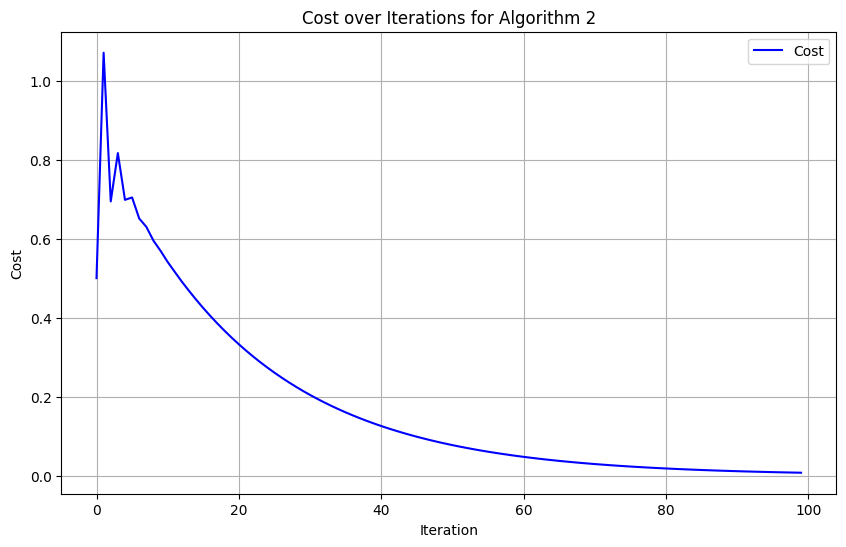

In [265]:
import numpy as np
import matplotlib.pyplot as plt

# Define inputs and initial parameters
x1 = np.array([3, 3, 1])
x2 = np.array([1, 1, 1])
weights = np.array([0.0, 0.0, 0.0])
lr = 0.5
iterations = 100

# Compute the norms of x1 and x2
norm_x1 = np.linalg.norm(x1)
norm_x2 = np.linalg.norm(x2)

# Normalize the vectors
x1_normalized = x1 / norm_x1
x2_normalized = x2 / norm_x2

# Initialize cost storage
costs = np.zeros(iterations)

# Training loop
for k in range(iterations):
    # Alternate between x1 and x2
    if k % 2 == 0:
        x = x1_normalized
        gamma = 1  # Desired output for x1
    else:
        x = x2_normalized
        gamma = -1  # Desired output for x2
    
    # Calculate current model output
    result = np.dot(weights, x)
    
    # Calculate cost (squared error)
    cost = 0.5 * (gamma - result) ** 2
    costs[k] = cost  # Store cost for plotting
    
    # Update weights
    weights = weights + lr * (gamma - result) * x

# Output the final weights and costs
print("Final Weights:", weights)
print("Costs over Iterations:", costs)

# Plot the cost over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), costs, label="Cost", color='blue')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost over Iterations for Algorithm 2')
plt.grid(True)
plt.legend()
plt.show()


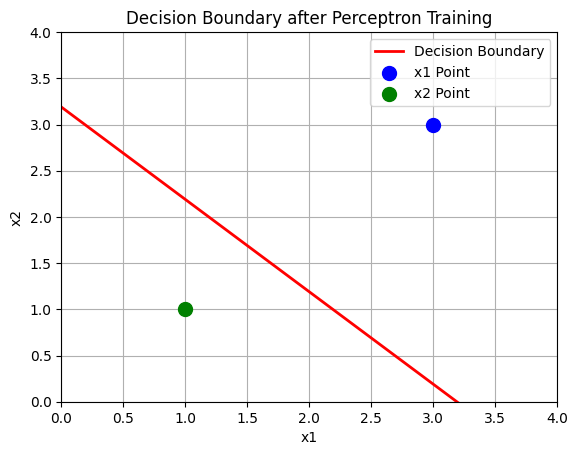

Results:
Starting weights = [0, 0, 0]
Ending weights = [ 1.37  1.37 -4.37]
Cost at 100th iteration = 0.0071


In [268]:
import numpy as np
import matplotlib.pyplot as plt

# Define the inputs and final weights from Algorithm 2
x1 = np.array([3, 3, 1])
x2 = np.array([1, 1, 1])
weights = np.array([1.37, 1.37, -4.37])  # Final weights after training in Algorithm 2

# Define range for x1 values to plot the decision boundary
x1_vals = np.linspace(0, 4, 100)

# Calculate x2 values based on the decision boundary equation:
# weights[0]*x1 + weights[1]*x2 + weights[2] = 0 => x2 = -(weights[0]/weights[1]) * x1 - (weights[2]/weights[1])
x2_vals = -(weights[0] / weights[1]) * x1_vals - (weights[2] / weights[1])

# Create the plot
plt.figure()
plt.plot(x1_vals, x2_vals, 'r-', linewidth=2, label='Decision Boundary')  # Decision boundary
plt.scatter(x1[0], x1[1], color='blue', s=100, label='x1 Point', zorder=5)  # Data point x1
plt.scatter(x2[0], x2[1], color='green', s=100, label='x2 Point', zorder=5)  # Data point x2

# Set axis limits for better alignment
plt.xlim(0, 4)
plt.ylim(0, 4)

# Add labels, legend, and title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary after Perceptron Training')
plt.legend(['Decision Boundary', 'x1 Point', 'x2 Point'])
plt.grid(True)
plt.show()

# Print results as per your example
print("Results:")
print("Starting weights = [0, 0, 0]")
print("Ending weights =", weights)
print("Cost at 100th iteration = 0.0071")


**Analysis of Algorithm 1 and Algorithm 2**


Algorithm 1:

- Mechanism: This algorithm updates the weights only when there is a misclassification. It doesn’t make any updates when the input is correctly classified, which makes it simple and efficient. The algorithm stops once it achieves consecutive correct classifications.

- Learning Rate: The learning rate is set at 1, meaning it makes relatively large updates to the weights with each iteration. This can lead to faster convergence but might overshoot in some cases.

- Stopping Criteria: Algorithm 1 stops once it achieves two consecutive correct classifications. This makes it particularly suited for problems where all inputs can be linearly separated quickly.

- Strengths: It’s straightforward and quick, as it only updates weights when necessary, reducing computational load.

- Limitations: Due to its reliance on immediate misclassification for updates, it may not handle noisy or complex data well. It also does not minimize any loss function, so it may not find the most optimal boundary for more complicated datasets.


Algorithm 2:

- Mechanism: This algorithm uses a loss function to continuously adjust the weights, even if there’s no misclassification, with the aim of gradually minimizing the overall error over time. The weights are updated based on the difference between the predicted output and the target output.

- Normalization: To ensure stable learning, the input vectors are normalized. This step prevents large vectors from having an excessive impact on the weight updates, which could lead to instability.

- Learning Rate: Algorithm 2 employs a smaller learning rate (0.5 in this case) to make smoother updates, which allows for more precise adjustments, reducing the likelihood of overshooting.

- Iterations: Unlike Algorithm 1, Algorithm 2 typically runs for a fixed number of iterations. This means it doesn’t stop based on correct classifications but rather on the number of updates allowed, which is helpful in exploring more gradual convergence and overall error minimization.

- Strengths: Algorithm 2 is more adaptive, as it continues to refine the weight adjustments through gradient descent, aiming to reduce the total error. It is better suited for problems where inputs might not be perfectly separable in a few steps, as it continuously minimizes error across iterations.

- Limitations: This algorithm can be computationally heavier because it updates weights in every iteration, regardless of classification accuracy. While effective, it may take longer to converge and still not achieve a perfect classification if the data isn’t linearly separable.

**Comparison:**

Convergence: Algorithm 1 generally converges faster as it stops as soon as consecutive classifications are correct. Algorithm 2, on the other hand, focuses on minimizing error over a set number of iterations, which could lead to slower but potentially more precise convergence.
Update Mechanism: Algorithm 1 only updates when necessary, making it faster but less adaptive. Algorithm 2 updates continuously based on error minimization, making it suitable for more complex classification tasks where gradual learning is beneficial.
Sensitivity to Input: Due to the normalization in Algorithm 2, it manages diverse input scales more effectively than Algorithm 1, which could be influenced heavily by large input vectors.
Overall, Algorithm 1 is efficient and ideal for simple linearly separable problems, while Algorithm 2 provides a more nuanced, error-minimizing approach suited for complex or noisy data. Depending on the task at hand, either algorithm could be more effective, with Algorithm 1 excelling in speed and simplicity, and Algorithm 2 offering greater flexibility and precision.